# Mar 12, 2024: simulate sbm with multiple blocks and core-peripheries with overlaps

In [1]:
import os
import numpy as np
import pandas as pd 
import networkx as nx
import graph_tool.all as gt
import pickle

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# plt.switch_backend("cairo")
# print(mpl.rcParams['backend'])

# ignore user warnings
import warnings
warnings.filterwarnings("ignore") #, category=UserWarning)

In [2]:
class ARGS():
    pass

args = ARGS()

args.SEED = 100
args.num_repeats = 100

gt.seed_rng(args.SEED)
np.random.seed(args.SEED)

In [3]:
# RUN THIS CODE IN TERMINAL
# parallel --max-procs 8 python 02b-desc-simulated-graphs-fit-sbm.py ::: 1 2 3 4 5 6 7 ::: d o p ::: 1 0 ::: 100

In [4]:
SIM_path = f'{os.environ["HOME"]}/mouse_dataset/simulations/02b'

In [5]:
def plots(args, marginal, pmode, g, state, bs, Bs, mdls):
    nrows, ncols = 1, 2
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), dpi=90)
    fig.tight_layout()
    ax = axs[0]
    sns.heatmap(gt.adjacency(g).todense(), ax=ax, square=True)
    ax = axs[1]
    gt.graph_draw(g, vertex_text=g.vertex_index, )
    state.draw(kwargs={'vertex_text':g.vertex_index})

    ncols = 1
    nrows = 1
    fig, axs = plt.subplots(
        nrows=nrows, ncols=ncols, 
        figsize=(4*ncols, 6*nrows), dpi=90,
        sharex=False, sharey=False
    )
    fig.tight_layout()
    ax = axs
    sns.heatmap(marginal, ax=ax)
    ax.set(
        title=f'marginals',
        xlabel='block', ylabel='roi',
        xticklabels=np.arange(marginal.shape[-1])+1,
    )

    nrows, ncols = 1, 2
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), dpi=90)
    fig.tight_layout()
    ax = axs[0]
    # sns.histplot(mdls, stat='proportion', ax=ax)
    ax.hist(mdls)
    ax.set(title=f'MDL', xlabel='MDL', ylabel='proportion')
    ax = axs[1]
    sns.barplot(Bs / np.sum(Bs))
    ax.set(title=f'num. blocks', xlabel='B', ylabel=f'$P(B | A)$', xlim=[1, 12])
    
    if (not args.sbm == 'p') and (state.overlap):
        v_blocks = [None for _ in range(g.num_vertices())]
        for v, hes in zip(g.iter_vertices(), state.half_edges):
            v_blocks[v] = [gt.contiguous_map(state.get_blocks())[he] for he in hes]
        print(v_blocks)
    return None

---

In [6]:
args.gn = 7

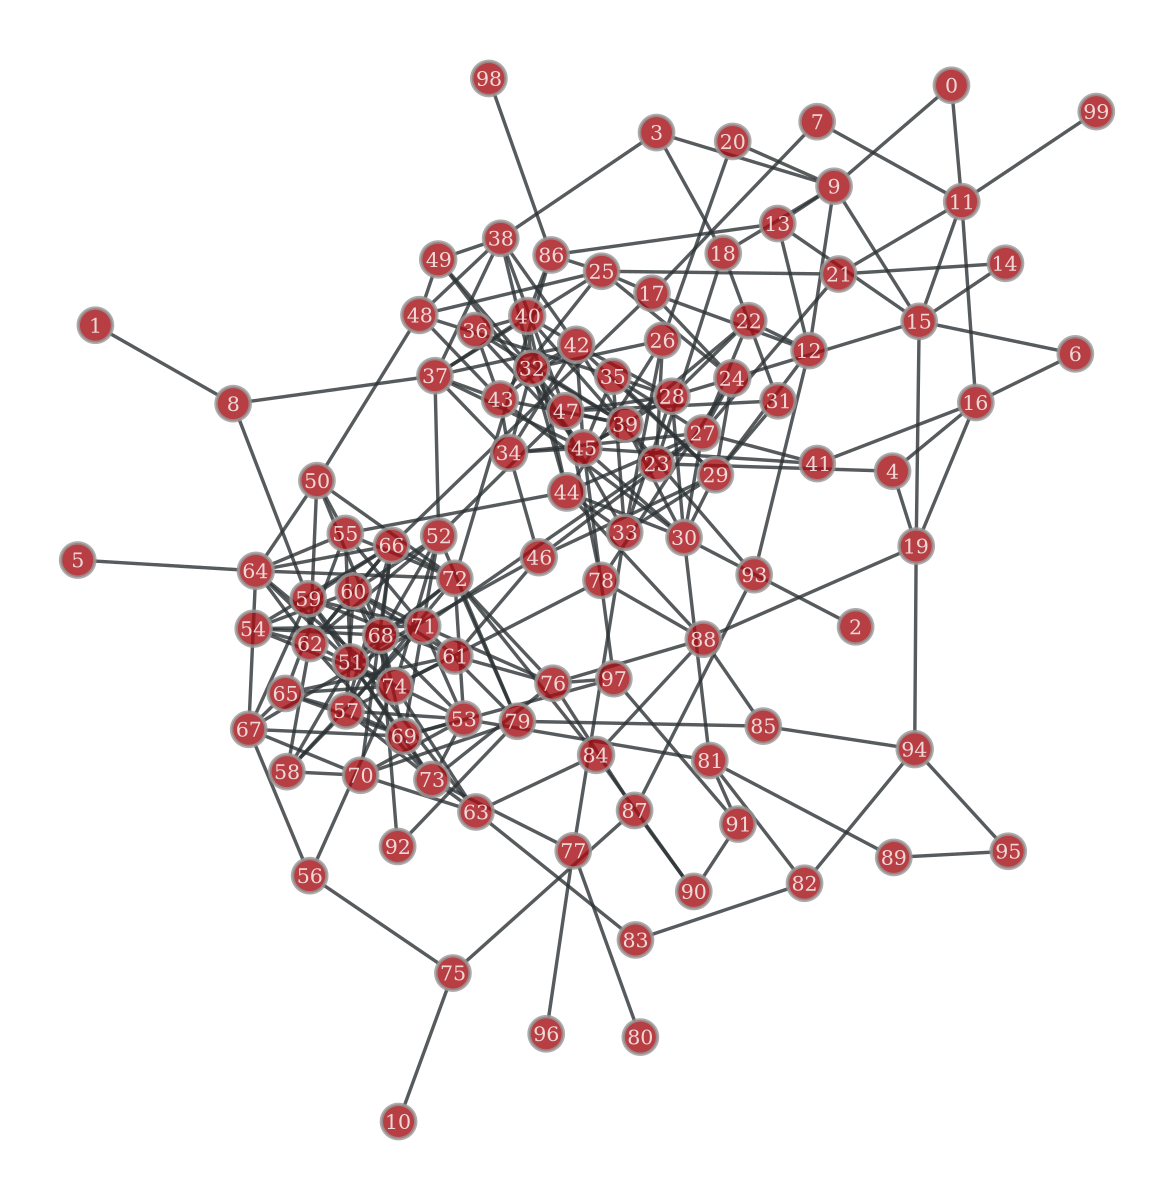

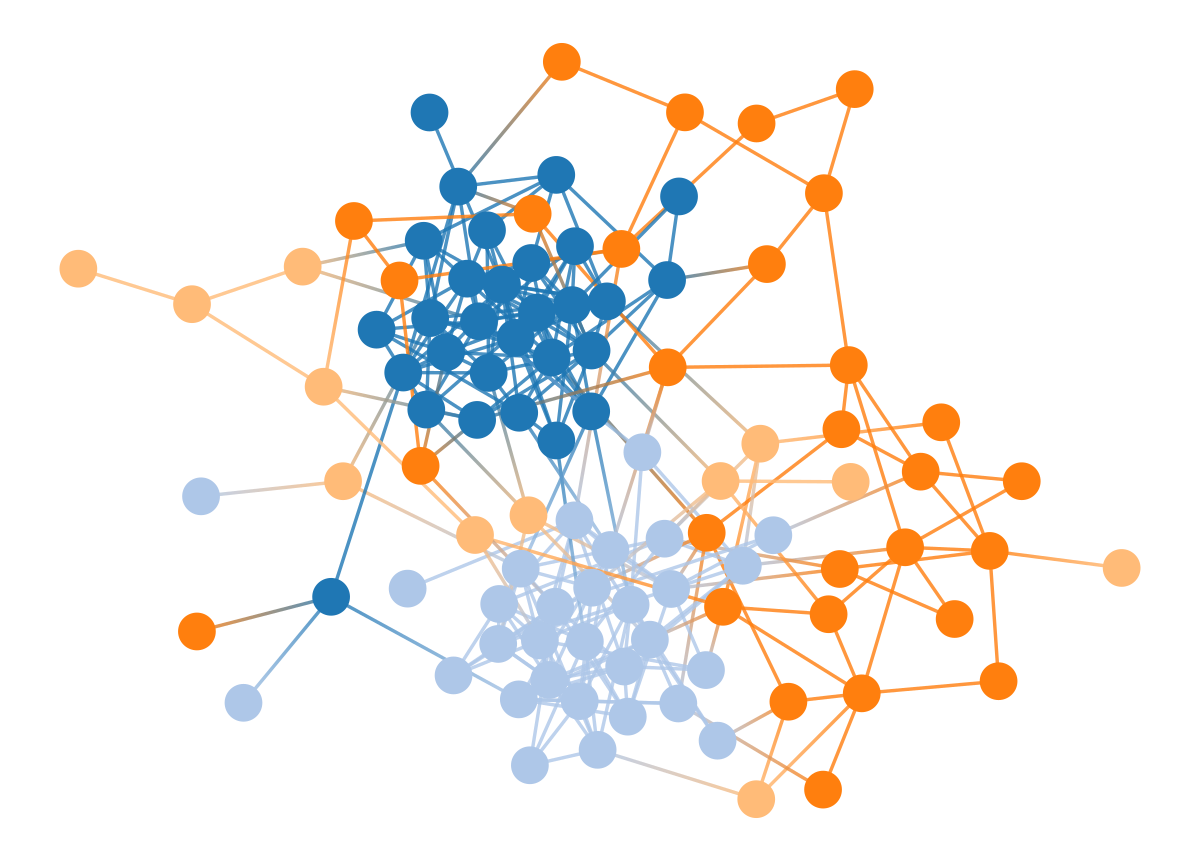

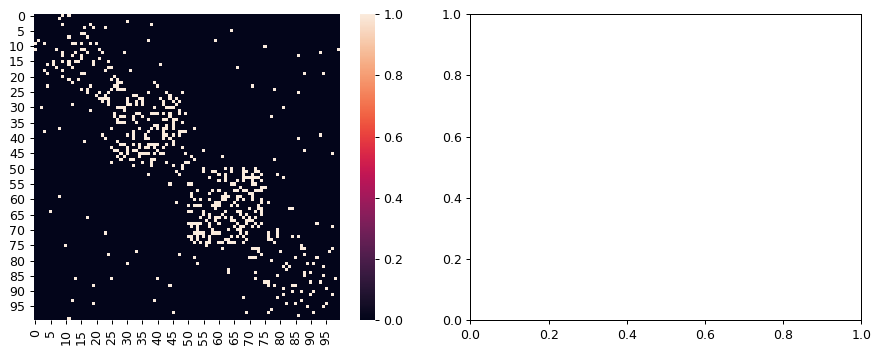

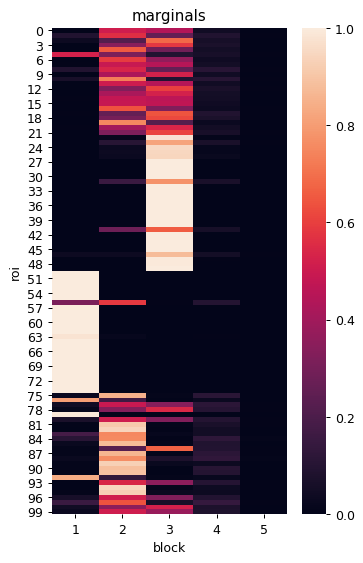

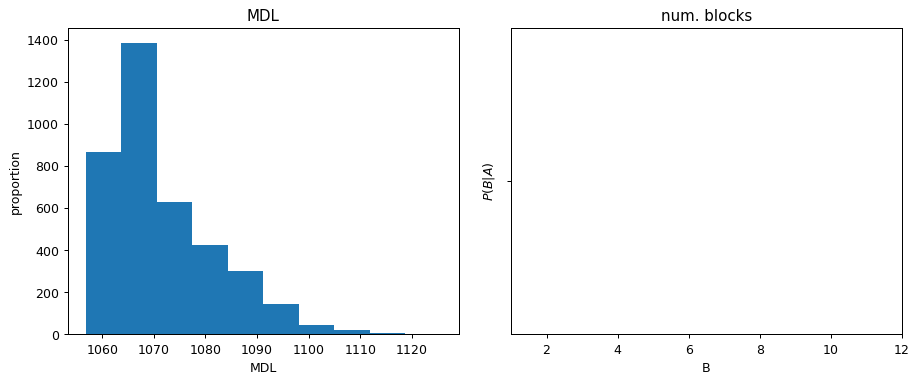

In [7]:
args.sbm = 'p'
args.dc = True

file_name = (
    f'gn-{args.gn}'
    f'_sbm-{args.sbm}'
    f'_dc-{args.dc}'
    f'.npy'
)
file = f'{SIM_path}/{file_name}'

with open(f'{file}', 'rb') as f:
    [marginal, pmode, g, state, bs, Bs, mdls] = pickle.load(f)

plots(args, marginal, pmode, g, state, bs, Bs, mdls)

---

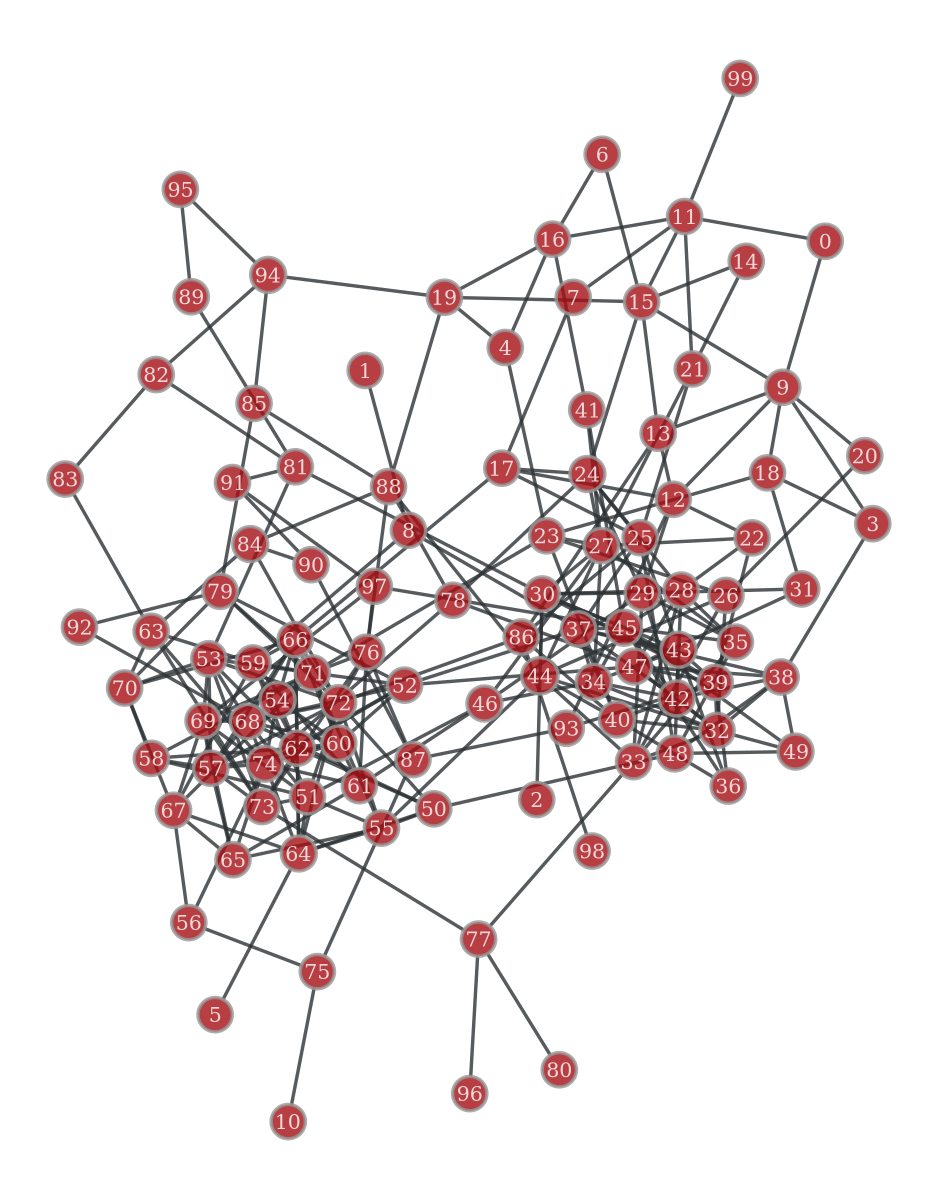

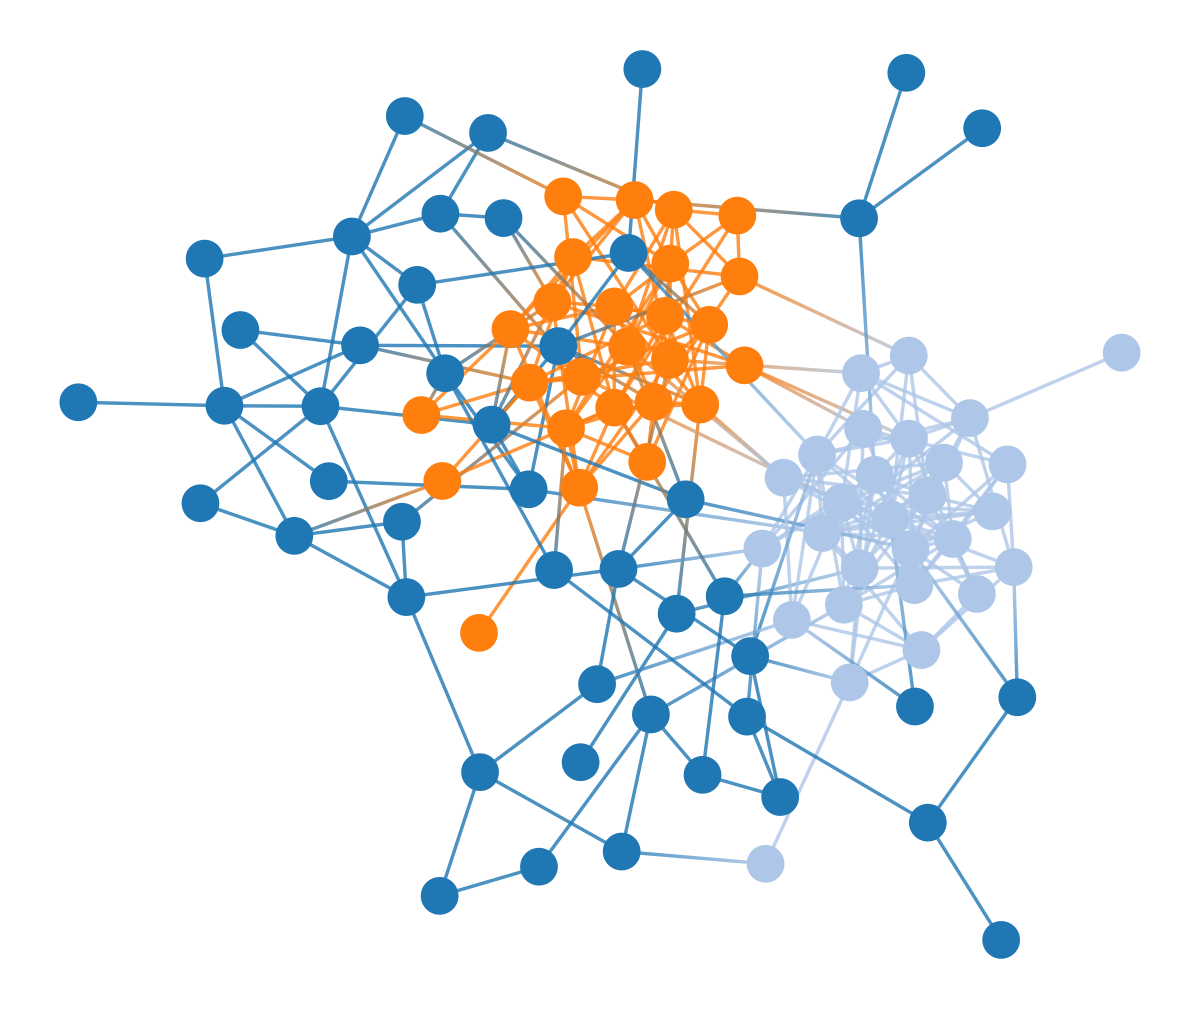

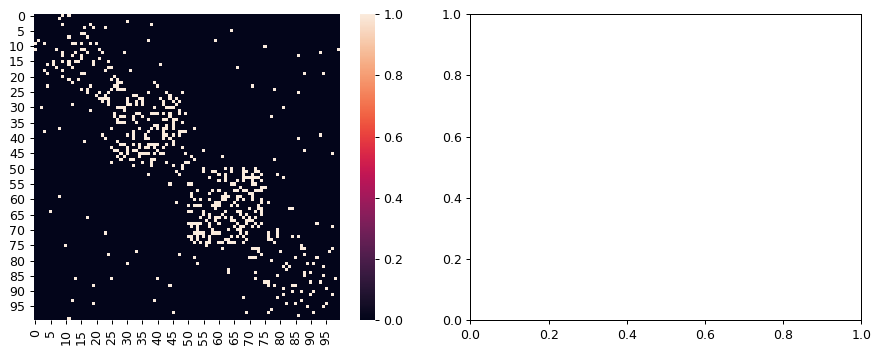

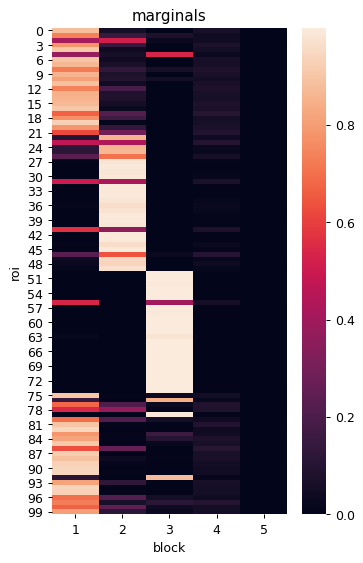

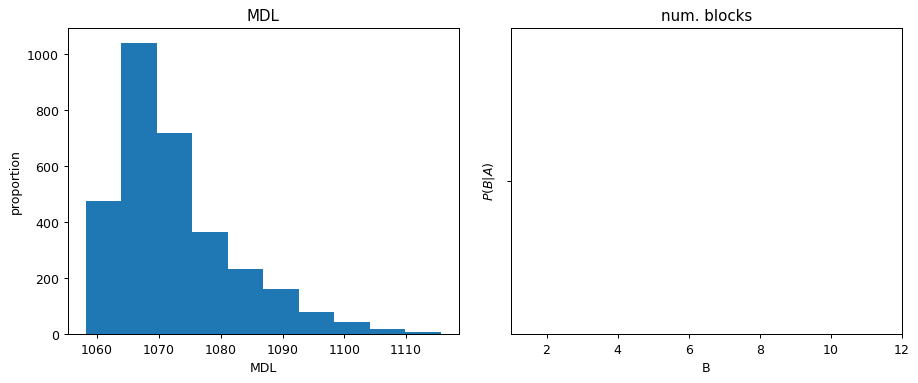

In [8]:
args.sbm = 'd'
args.dc = True

file_name = (
    f'gn-{args.gn}'
    f'_sbm-{args.sbm}'
    f'_dc-{args.dc}'
    f'.npy'
)
file = f'{SIM_path}/{file_name}'

with open(f'{file}', 'rb') as f:
    [marginal, pmode, g, state, bs, Bs, mdls] = pickle.load(f)

plots(args, marginal, pmode, g, state, bs, Bs, mdls)

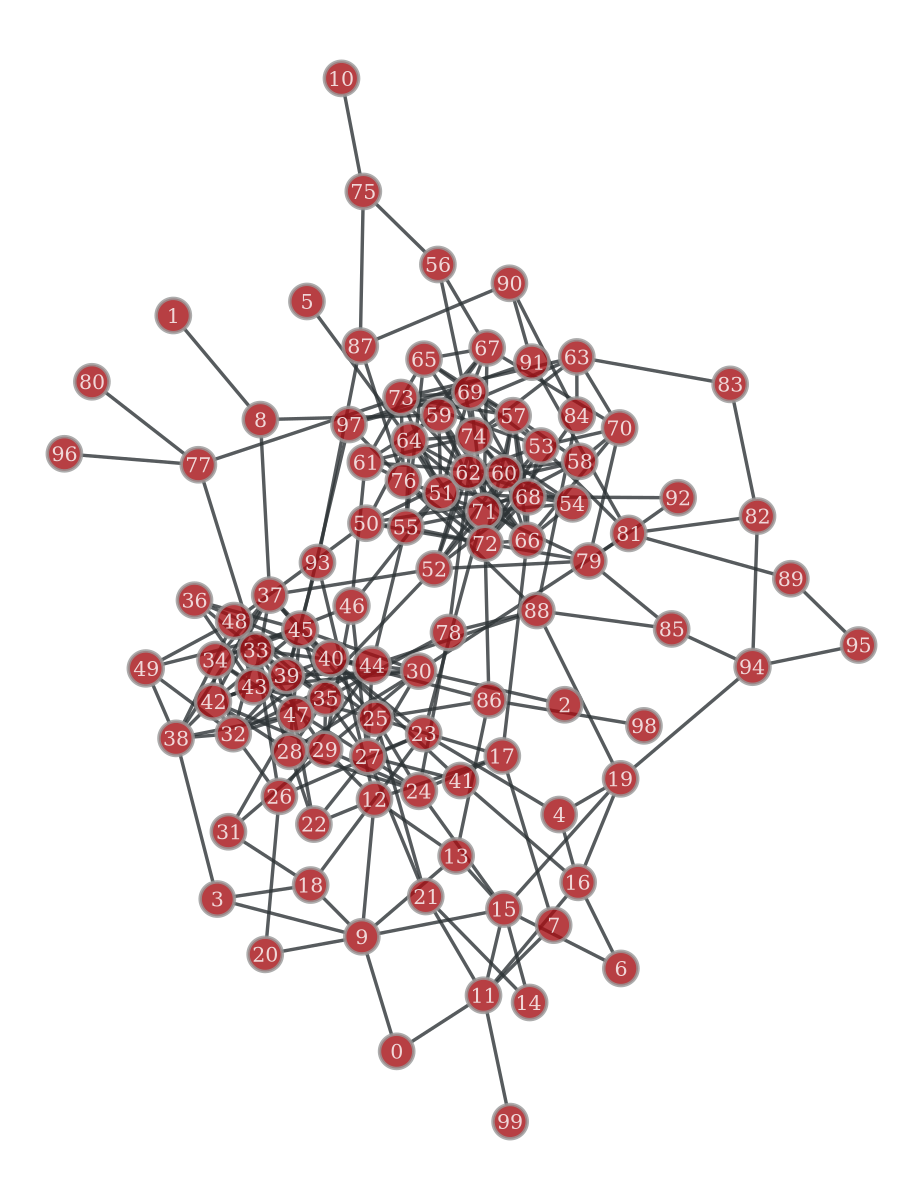

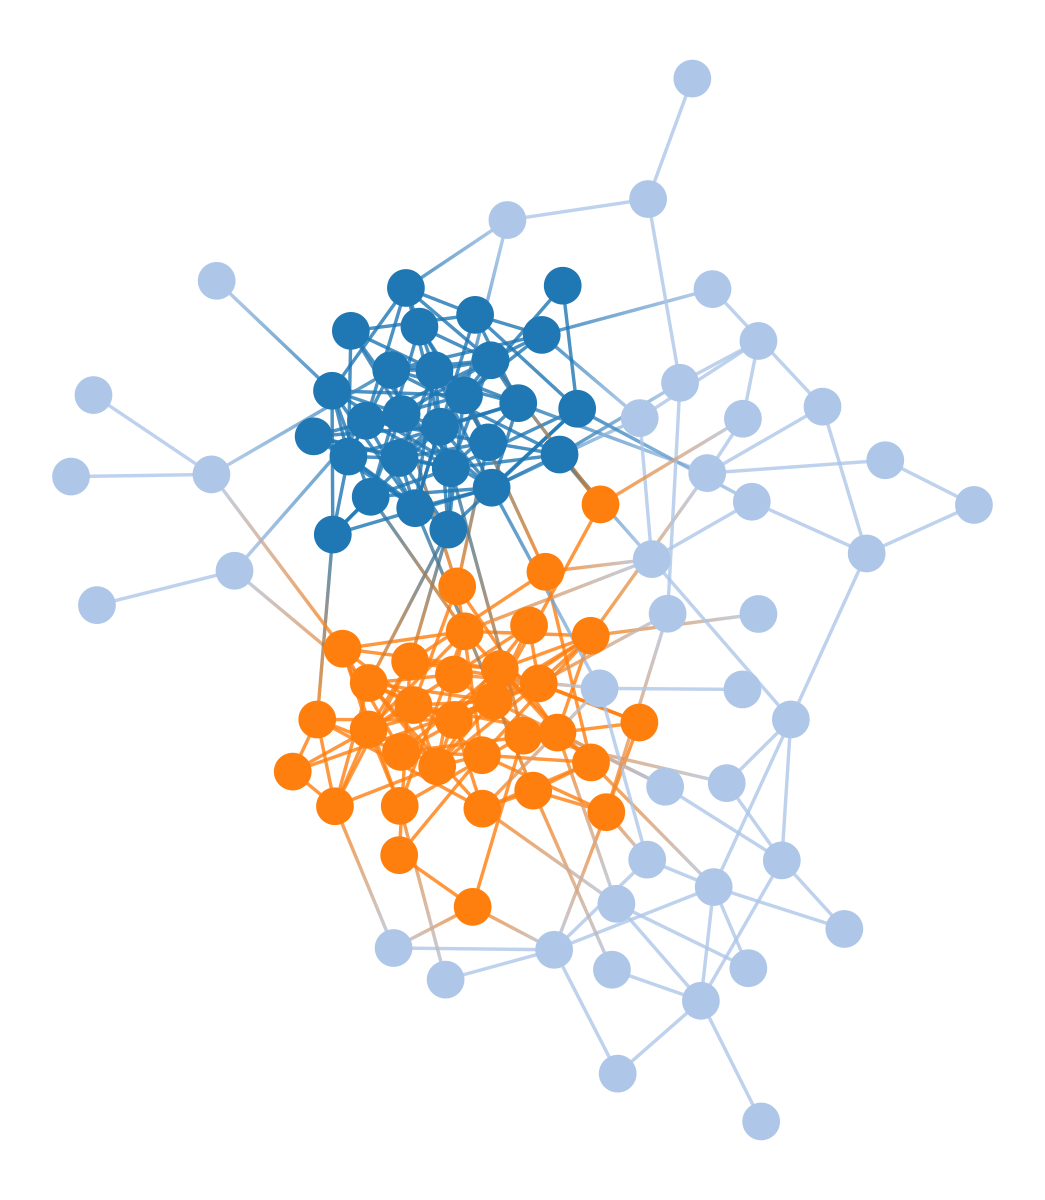

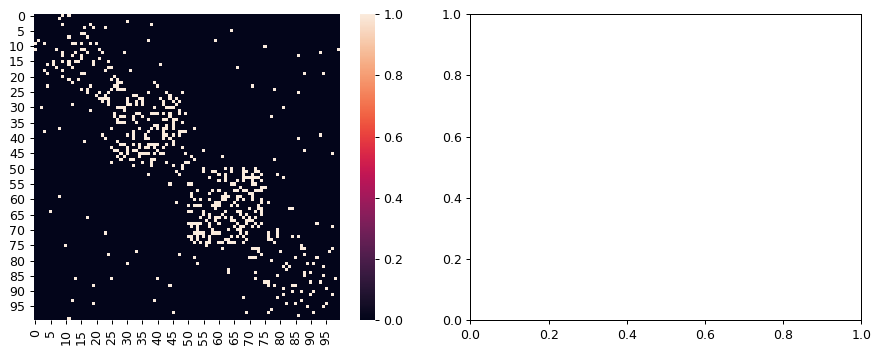

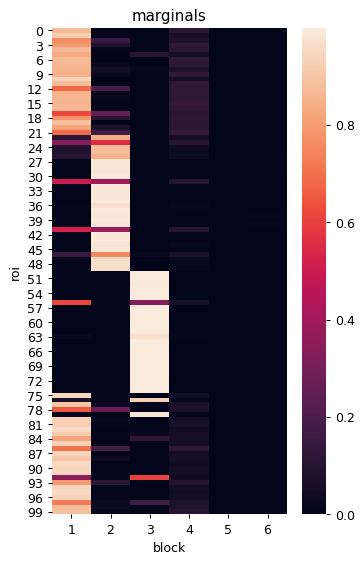

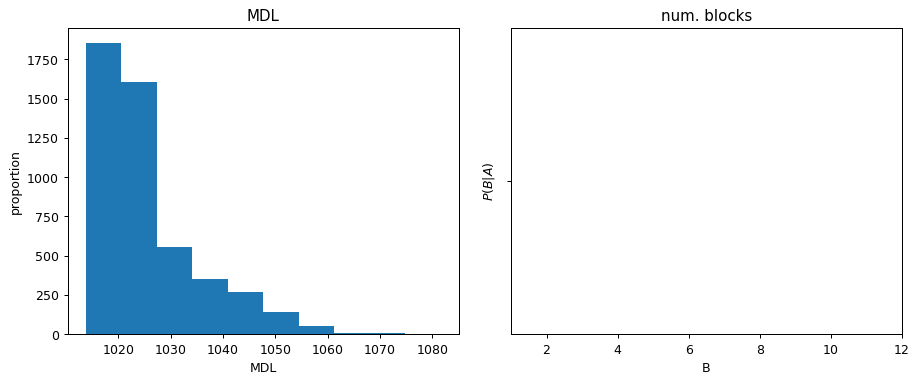

In [9]:
args.sbm = 'd'
args.dc = False

file_name = (
    f'gn-{args.gn}'
    f'_sbm-{args.sbm}'
    f'_dc-{args.dc}'
    f'.npy'
)
file = f'{SIM_path}/{file_name}'

with open(f'{file}', 'rb') as f:
    [marginal, pmode, g, state, bs, Bs, mdls] = pickle.load(f)

plots(args, marginal, pmode, g, state, bs, Bs, mdls)

---

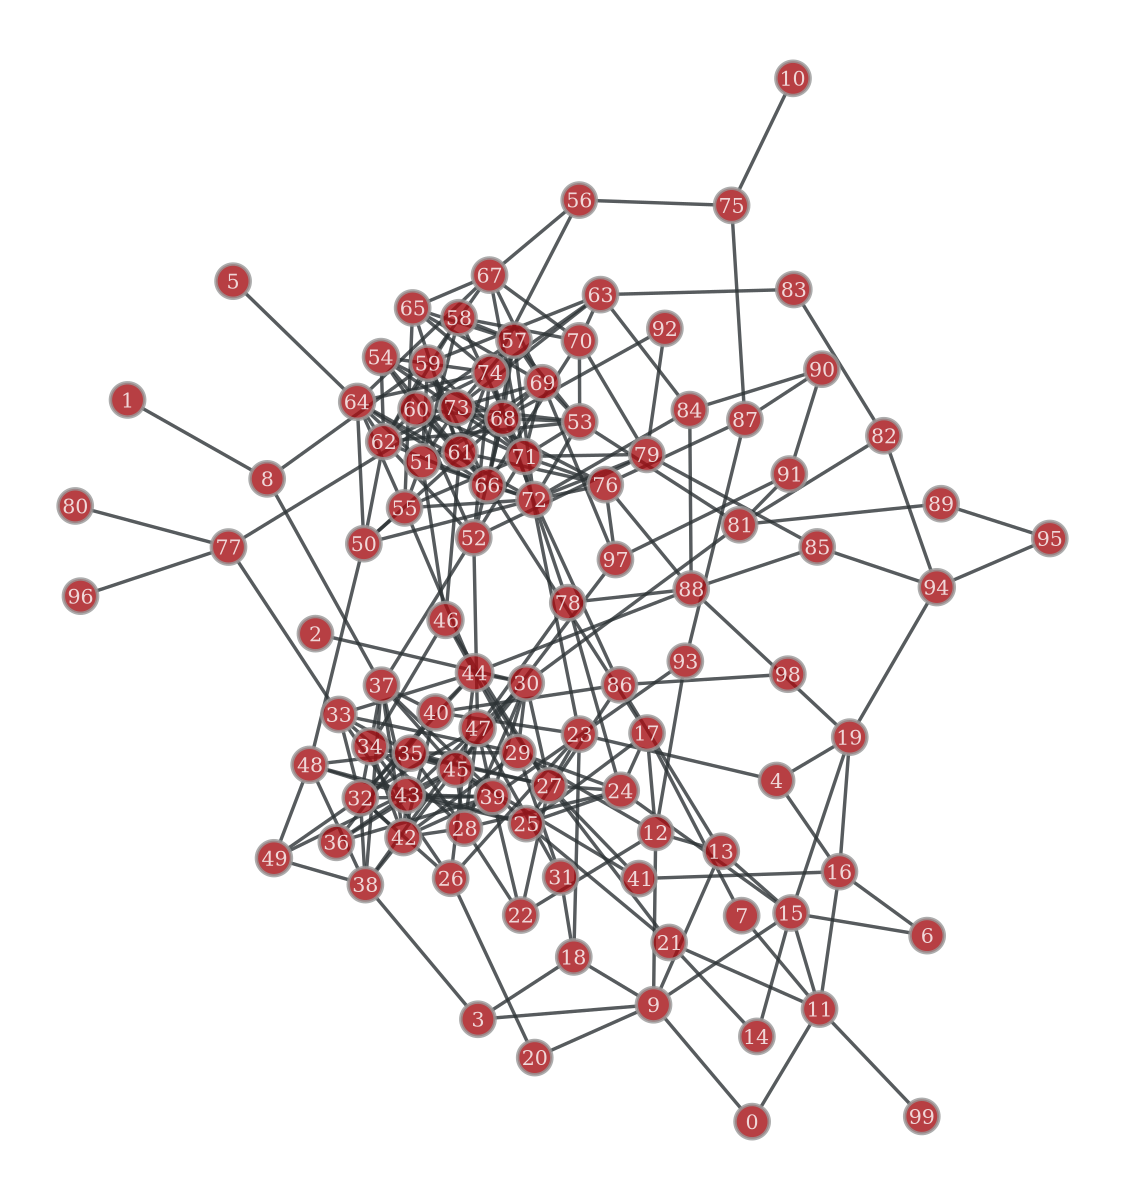

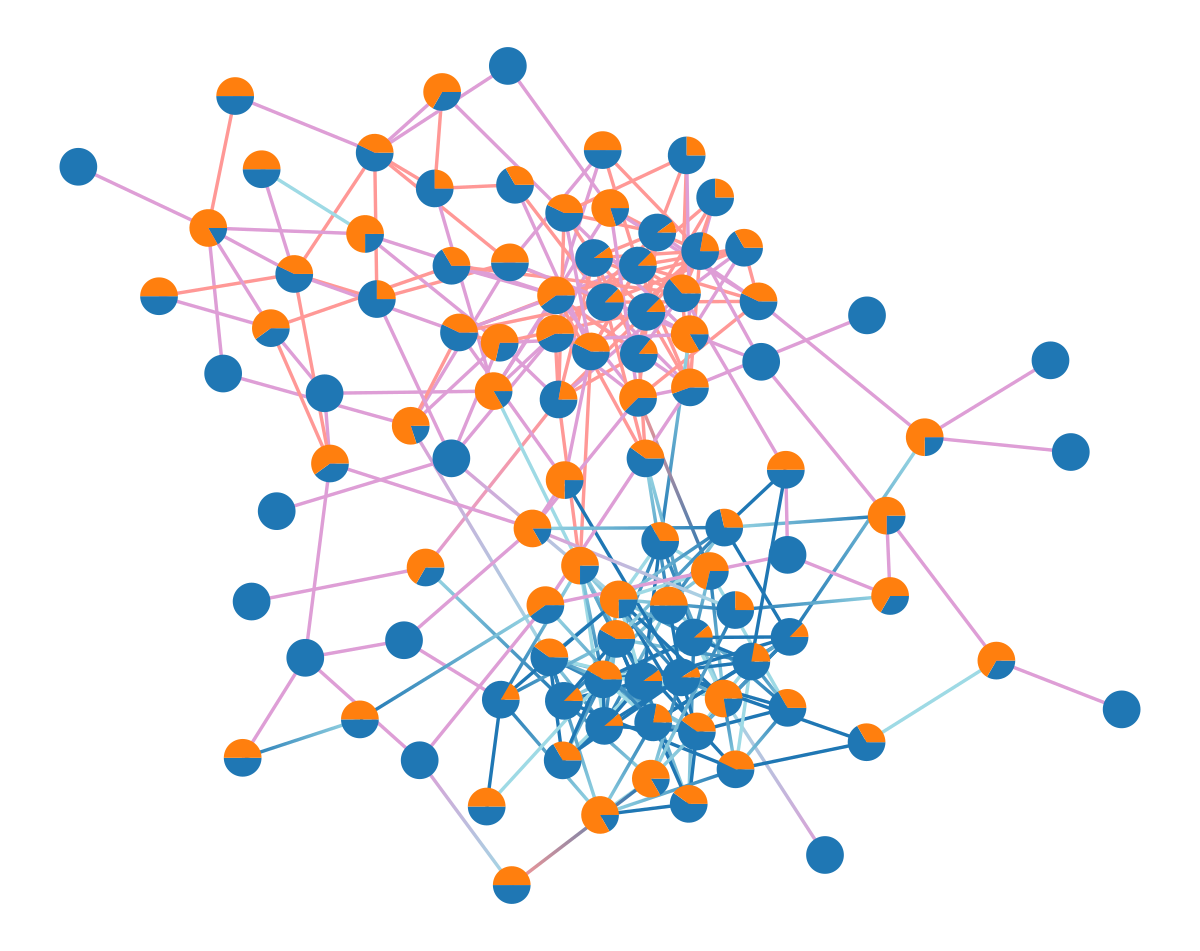

[[0, 1], [0], [0], [0, 1, 0], [0, 0, 0], [0], [1, 0], [0, 0], [0, 0, 2], [0, 0, 1, 1, 1, 1, 0], [0], [1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0], [1, 1, 1, 0], [0, 2], [1, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0, 0], [0, 0], [0, 2, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0, 0, 2], [0, 1, 1, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1], [0, 0, 1, 0, 1, 1, 0, 1, 0], [1, 1, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0, 0], [0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 0, 0, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0], [1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0, 1, 0], [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 2, 2], [1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 2], [1, 1, 1, 0], [3, 2, 3, 3, 3, 2], [3, 3, 3, 3, 2, 3, 3, 3, 3], [1, 1, 2, 2, 2, 2, 2, 2], [3, 3, 2, 3

[array([1859, 1936,    8,    1], dtype=int32),
 array([2023, 1734,   42,    5], dtype=int32),
 array([1866, 1933,    4,    1], dtype=int32),
 array([1990, 1803,    8,    3], dtype=int32),
 array([2024, 1775,    5], dtype=int32),
 array([2006, 1786,    9,    3], dtype=int32),
 array([1925, 1816,   51,   12], dtype=int32)]

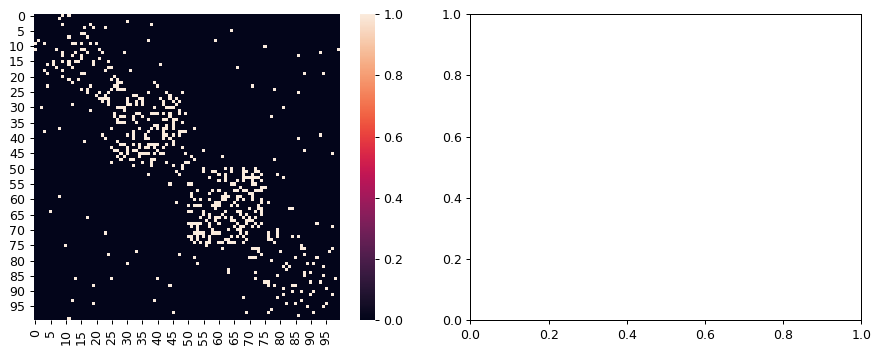

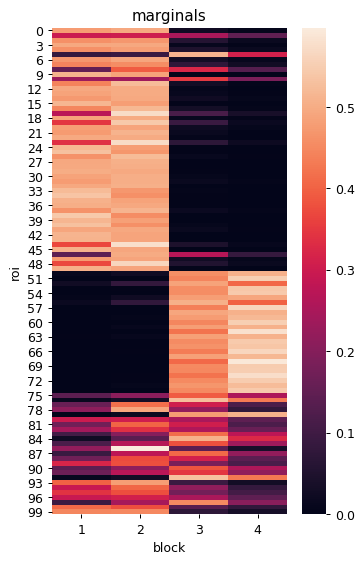

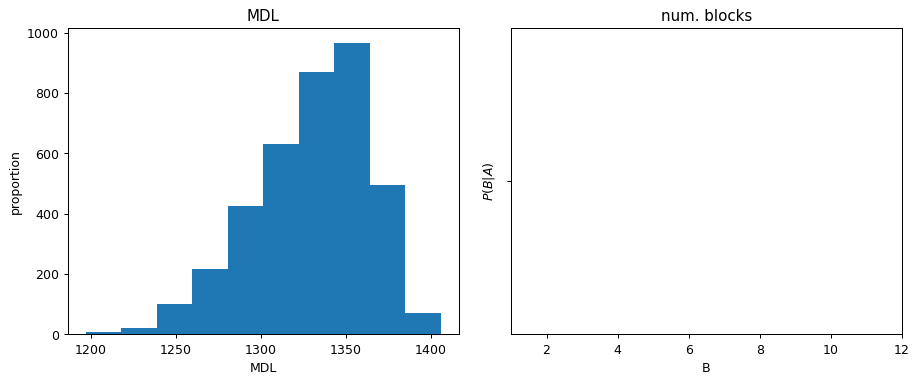

In [10]:
args.sbm = 'o'
args.dc = True

file_name = (
    f'gn-{args.gn}'
    f'_sbm-{args.sbm}'
    f'_dc-{args.dc}'
    f'.npy'
)
file = f'{SIM_path}/{file_name}'

with open(f'{file}', 'rb') as f:
    [marginal, pmode, g, state, bs, Bs, mdls] = pickle.load(f)

plots(args, marginal, pmode, g, state, bs, Bs, mdls)

v_idx = 24
hes = list(state.half_edges)[v_idx]
[list(pmode.get_marginal(state.g))[he] for he in hes]

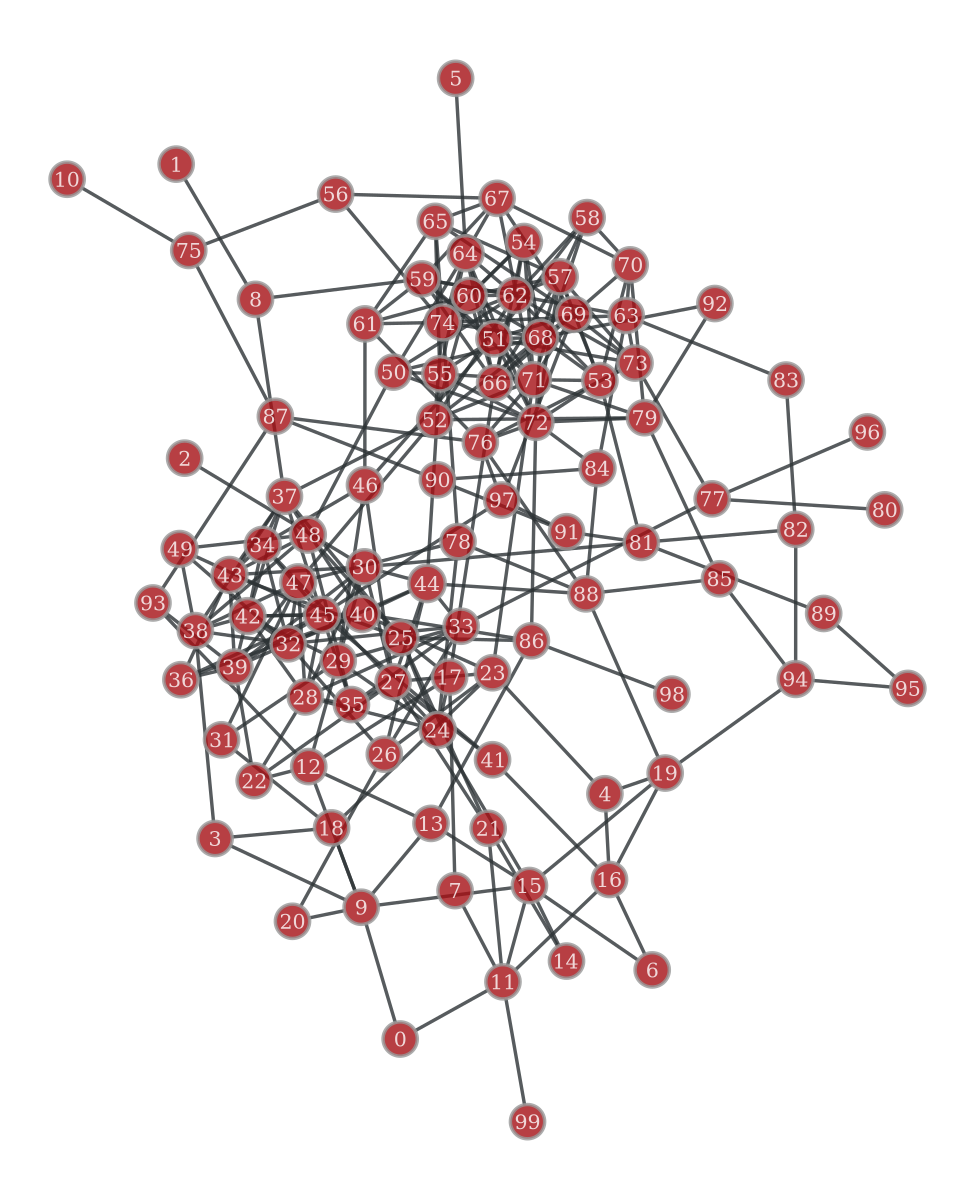

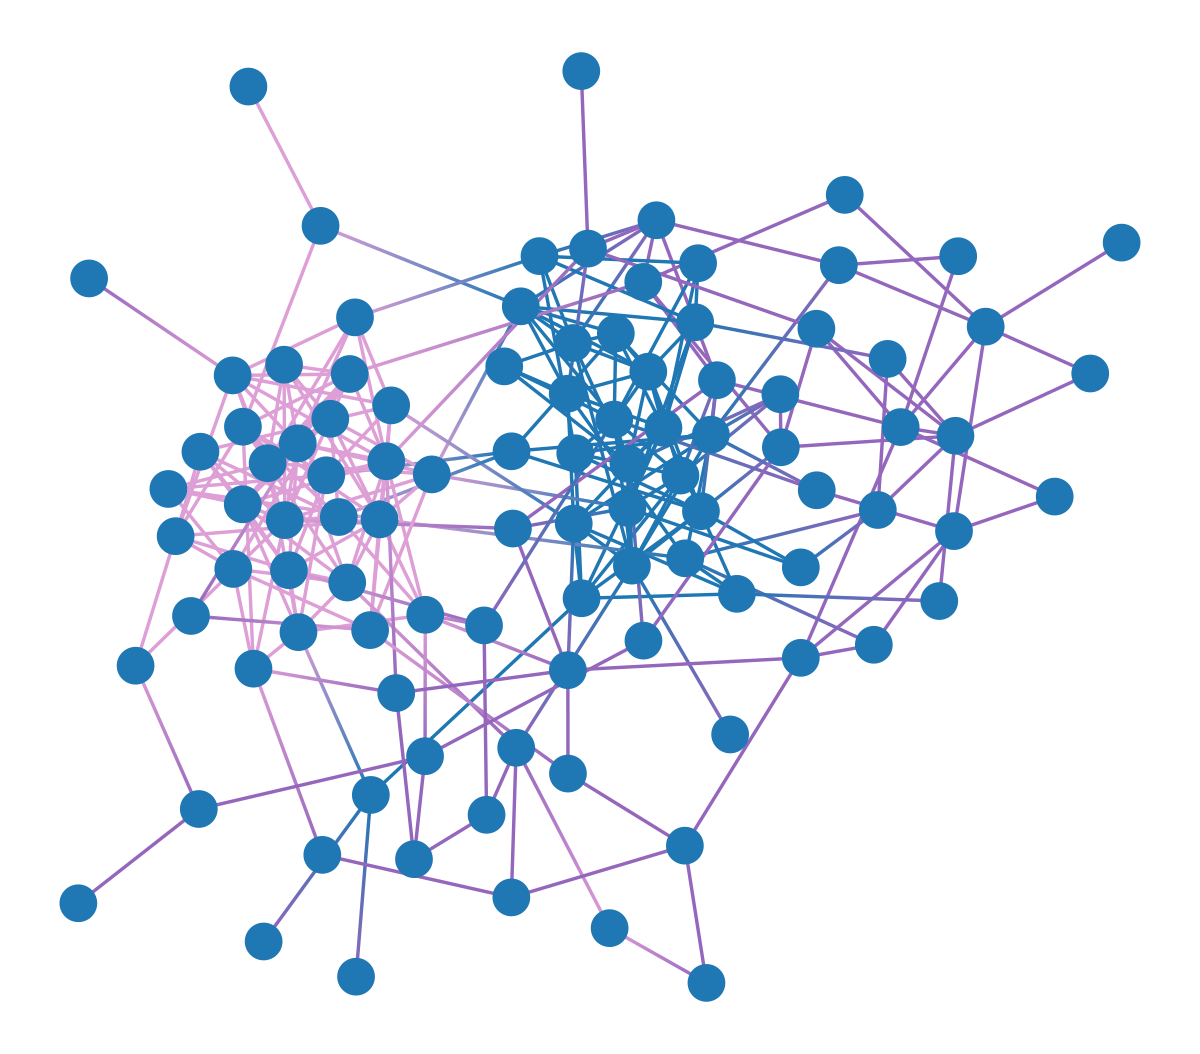

[[1, 1], [0], [1], [1, 1, 1], [1, 1, 1], [1], [1, 1], [1, 1], [0, 0, 0], [1, 1, 1, 1, 1, 1, 1], [1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2], [2, 2, 2, 2], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0

[array([   1,    0, 5843], dtype=int32),
 array([   2,    0, 5842], dtype=int32),
 array([   0,    0, 5844], dtype=int32),
 array([   0,    0, 5844], dtype=int32),
 array([   0,    0, 5844], dtype=int32),
 array([   1,    0, 5843], dtype=int32),
 array([   0,    0, 5844], dtype=int32),
 array([   1,    0, 5843], dtype=int32)]

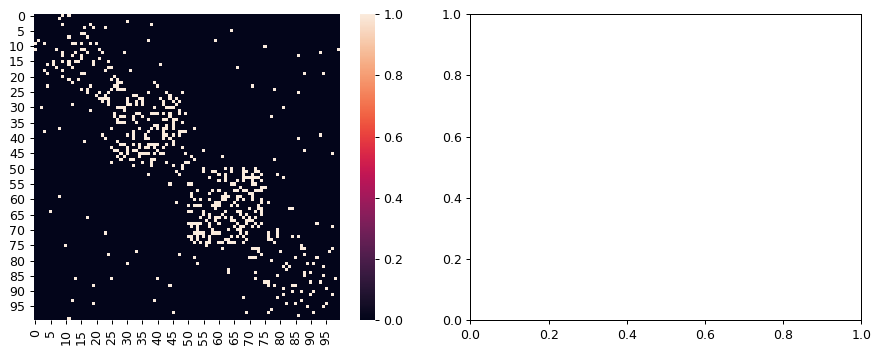

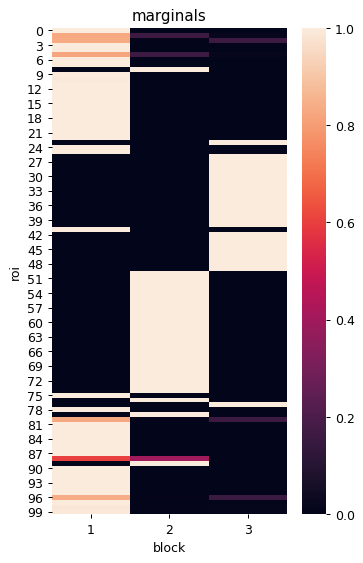

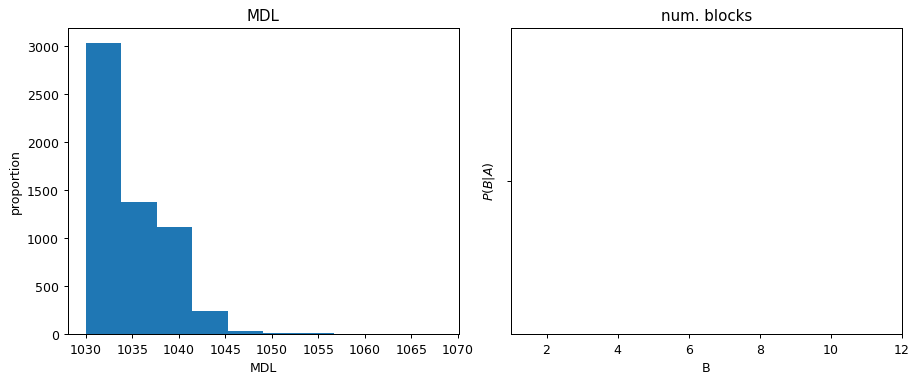

In [11]:
args.sbm = 'o'
args.dc = False

file_name = (
    f'gn-{args.gn}'
    f'_sbm-{args.sbm}'
    f'_dc-{args.dc}'
    f'.npy'
)
file = f'{SIM_path}/{file_name}'

with open(f'{file}', 'rb') as f:
    [marginal, pmode, g, state, bs, Bs, mdls] = pickle.load(f)

plots(args, marginal, pmode, g, state, bs, Bs, mdls)

v_idx = 29
hes = list(state.half_edges)[v_idx]
[list(pmode.get_marginal(state.g))[he] for he in hes]